In [1]:
%matplotlib inline

In [3]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
from subprocess import check_output
print(check_output(['ls', './input']).decode("utf8"))

Iris.csv



In [6]:
iris = pd.read_csv('./input/Iris.csv')
iris.shape

(150, 6)

In [7]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
iris = iris[:100]
iris.shape

(100, 6)

In [9]:
iris.Species = iris.Species.replace(to_replace=['Iris-setosa', 'Iris-versicolor'], value=[0,1])

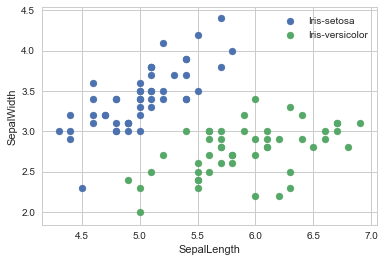

In [10]:
plt.scatter(iris[:50].SepalLengthCm, iris[:50].SepalWidthCm, label='Iris-setosa')
plt.scatter(iris[51:].SepalLengthCm, iris[51:].SepalWidthCm, label='Iris-versicolor')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend(loc='best')

In [11]:
X = iris.drop(labels=['Id', 'Species'], axis=1).values
y = iris.Species.values

In [13]:
seed = 2018
np.random.seed(seed)
tf.set_random_seed(seed)

In [14]:
train_index = np.random.choice(len(X), round(len(X) * 0.8), replace=False)
test_index = np.array(list(set(range(len(X))) - set(train_index)))
train_X = X[train_index]
train_y = y[train_index]
test_X = X[test_index]
test_y = y[test_index]

In [15]:
def min_max_normalized(data):
    col_max = np.max(data, axis=0)
    col_min = np.min(data, axis=0)
    return np.divide(data - col_min, col_max - col_min)
    

In [16]:
train_X = min_max_normalized(train_X)
test_X = min_max_normalized(test_X)

In [19]:
A = tf.Variable(tf.random_normal(shape=[4,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [23]:
data = tf.placeholder(dtype=tf.float32, shape=[None, 4])
target = tf.placeholder(dtype=tf.float32, shape=[None,1])

In [24]:
mod = tf.matmul(data, A) + b

In [25]:
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=mod, 
                                                              labels=target))

In [26]:
learning_rate = 0.003
batch_size = 30
iter_num = 1500

In [27]:
opt = tf.train.GradientDescentOptimizer(learning_rate)

In [28]:
goal = opt.minimize(loss)

In [30]:
prediction = tf.round(tf.sigmoid(mod))
correct = tf.cast(tf.equal(prediction, target), dtype=tf.float32)
accuracy = tf.reduce_mean(correct)

In [31]:
loss_trace = []
train_acc = []
test_acc = []

In [35]:
for epoch in range(iter_num):
    batch_index = np.random.choice(len(train_X), size=batch_size)
    batch_train_X = train_X[batch_index]
    batch_train_y = np.matrix(train_y[batch_index]).T
    sess.run(goal, feed_dict={data:batch_train_X, target:batch_train_y})
    temp_loss = sess.run(loss, feed_dict={data:batch_train_X, target:batch_train_y})
    temp_train_acc = sess.run(accuracy, feed_dict={data:train_X, 
                                                   target:np.matrix(train_y).T})
    temp_test_acc = sess.run(accuracy, feed_dict={data:test_X, 
                                                  target:np.matrix(test_y).T})
    loss_trace.append(temp_loss)
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    if (epoch+1)%300 == 0:
        print('epoch:{:4d} loss:{:5f} train_acc:{:5f} test_acc:{:5f}'
              .format(epoch+1, temp_loss, temp_train_acc, temp_test_acc))

epoch: 300 loss:0.965348 train_acc:0.487500 test_acc:0.550000
epoch: 600 loss:0.853597 train_acc:0.475000 test_acc:0.550000
epoch: 900 loss:0.728609 train_acc:0.362500 test_acc:0.550000
epoch:1200 loss:0.661529 train_acc:0.750000 test_acc:0.900000
epoch:1500 loss:0.631288 train_acc:0.812500 test_acc:1.000000


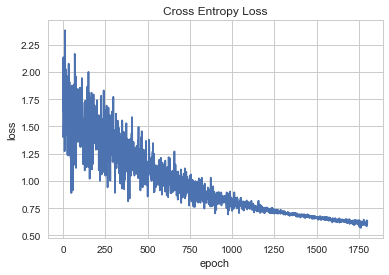

In [37]:
plt.plot(loss_trace)
plt.title('Cross Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

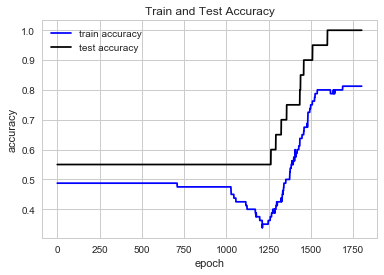

In [38]:
plt.plot(train_acc, 'b-', label='train accuracy')
plt.plot(test_acc, 'k-', label='test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Train and Test Accuracy')
plt.legend(loc='best')
plt.show()

https://www.kaggle.com/autuanliuyc/logistic-regression-with-tensorflow